<h1 align="center" style="color:purple">Phase 1: AtliQ0 Bank Credit Card Project</h1>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_c=pd.read_csv('../data/customers.csv')
df_p=pd.read_csv('../data/credit_profiles.csv')
df_t=pd.read_csv('../data/transactions.csv')
df_c.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [111]:
df_t.shape

(500000, 7)

In [4]:
df_p.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [5]:
df_t.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [113]:
df_t['cust_id'].nunique()

1000

In [6]:
df_c.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [7]:
g=df_c.groupby('occupation').annual_income.median()
g

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [8]:
def get_occ(x):
    if pd.isnull(x['annual_income']):
        return g[x['occupation']]
    else:
        return x['annual_income']

In [9]:
df_c['annual_income']=df_c.apply(lambda x: g[x['occupation']] if pd.isnull(x['annual_income']) else x['annual_income'] 
                                                  ,axis=1)

In [10]:
df_c.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [11]:
df_c.loc[[14,22]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
22,23,Ishan Patel,Male,19,City,Freelancer,36863.0,Married


<Axes: xlabel='annual_income', ylabel='Count'>

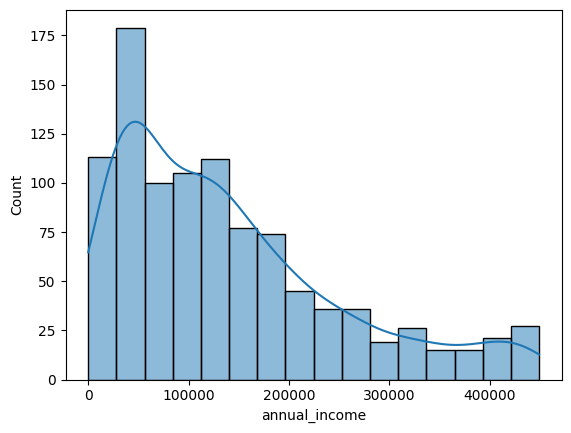

In [12]:
sns.histplot(df_c['annual_income'],kde=True)

In [13]:
df_c.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [14]:
df_c[df_c['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [15]:
df_c.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [16]:
df_c.at[3,'annual_income']

np.float64(33563.0)

In [17]:
for idx, row in df_c.iterrows():
    if row['annual_income']<100:
        df_c.at[idx,'annual_income']=g[row['occupation']]
    else:
        df_c.at[idx,'annual_income']=row['annual_income']
        
        
        

In [18]:
df_c[df_c['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [19]:
df_c.loc[[31,262,333]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,261191.5,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,135759.0,Married


In [20]:
g

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [21]:
g.values

array([ 65265. ,  45794. , 261191.5,  58017. , 135759. ,  46759. ,
        76774. ])

In [22]:
g.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

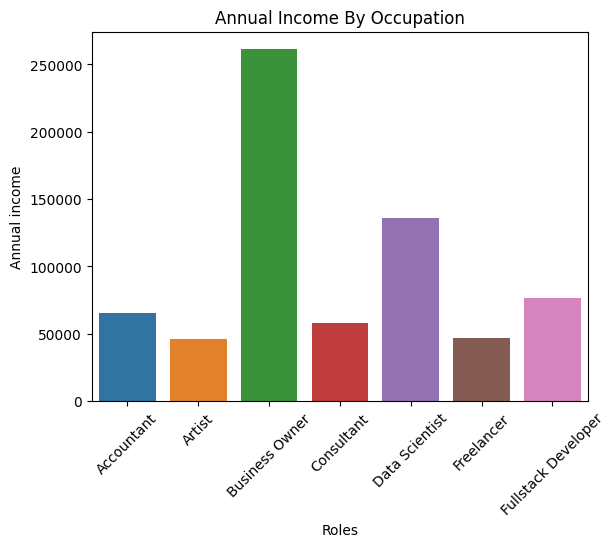

In [23]:
sns.barplot(x=g.index ,y=g.values,palette='tab10')
plt.xticks(rotation=45)
plt.title('Annual Income By Occupation')
plt.xlabel('Roles')
plt.ylabel('Annual income')
plt.show()


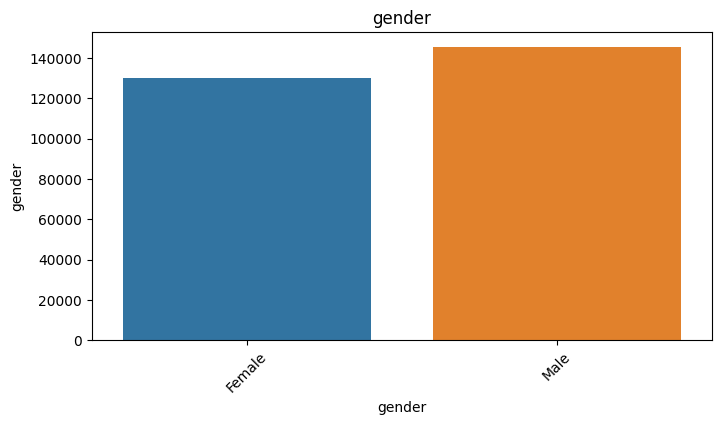

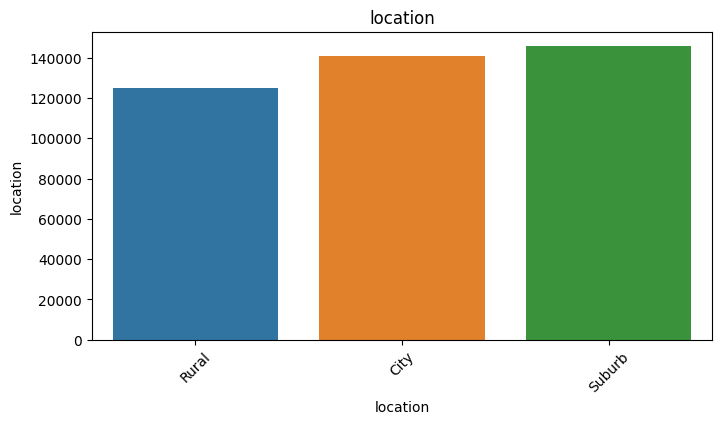

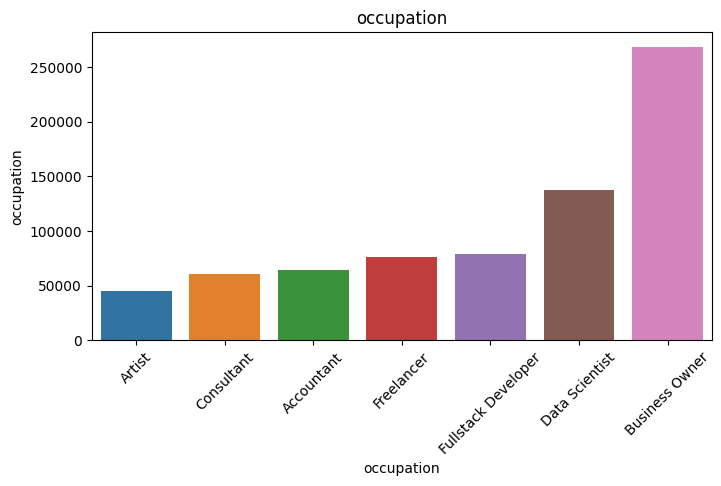

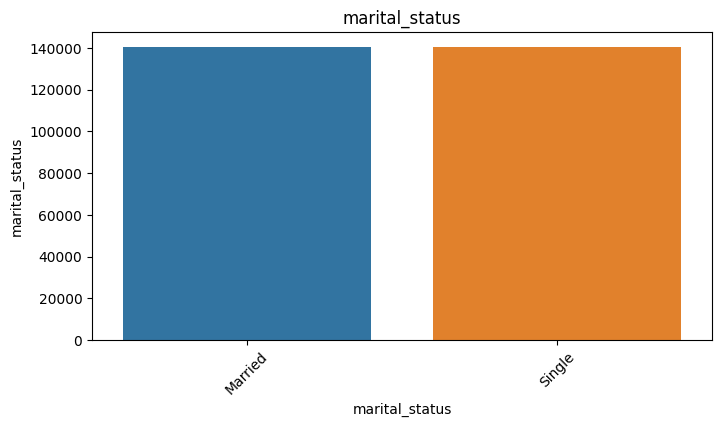

In [24]:
cat=['gender','location','occupation','marital_status']

for col in cat:
    plt.figure(figsize=(8,4))
    f=df_c.groupby(col).annual_income.mean().sort_values()
    sns.barplot(x=f.index ,y=f.values, palette='tab10')
    plt.xticks(rotation=45)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(col)

In [25]:
df_c['age'].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [26]:
df_c['age'].median()

np.float64(32.0)

In [27]:
df_c['age'].mode()

0    29
Name: age, dtype: int64

In [28]:
df_c['age'].isnull().sum()

np.int64(0)

In [29]:
df_c[(df_c['age']<15) | (df_c['age']>80) ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [30]:
mod=df_c.groupby('occupation').age.median()
mod

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [31]:
df_c['age']=df_c.apply(lambda x: mod[x['occupation']] if x['age']<15 or x['age']>80 else x['age'],axis=1)

In [32]:
df_c[(df_c['age']<15) | (df_c['age']>80) ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [33]:
df_c.loc[[0,41,165]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,26.0,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,24.0,City,Freelancer,39721.0,Single


In [34]:
df_c.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


In [35]:
# def get_g(x):
#     if x['age']>=18 and x['age']<=25:
#         return '15-25'
#     elif x['age']>=26 and x['age']<=48:
#         return '26-48'
#     elif x['age']>=49 and x['age']<=65:
#         return '49-65'
# df_c['age_group']=df_c.apply(get_g,axis=1)
# df_c.head()

### by chatgpt

In [36]:
bin_edges=[17,25,48,65]
bin_label=['18-25','26-48','29-65']
df_c['age_group']=pd.cut(df_c['age'], bins=bin_edges, labels=bin_label)
df_c.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,29-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [37]:
v=df_c['age_group'].value_counts(normalize=True)*100
v

age_group
26-48    56.7
18-25    24.6
29-65    18.7
Name: proportion, dtype: float64

In [38]:
type(v)

pandas.core.series.Series

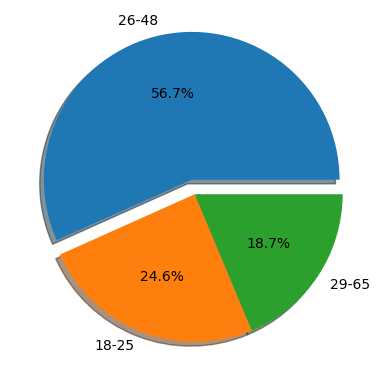

In [39]:
plt.pie(v, labels=v.index, autopct='%1.1f%%', shadow=True, explode=(0.1,0,0))
plt.show()

In [40]:
df_c['location'].value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [41]:
p=df_c.groupby(['location','gender']).size().unstack()

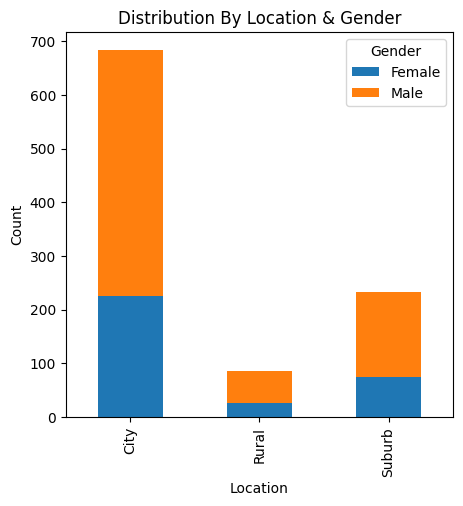

In [42]:

p.plot(kind='bar',stacked=True,figsize=(5,5))
plt.title('Distribution By Location & Gender')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


In [43]:
df_p.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [44]:
df_p.shape

(1004, 6)

In [45]:
df_p['cust_id'].nunique()

1000

In [46]:
df_p[df_p['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [47]:
df_cs_clean=df_p.drop_duplicates(subset='cust_id',keep='last')
df_cs_clean.shape

(1000, 6)

In [48]:
df_cs_clean[df_cs_clean['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [49]:
df_cs_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [50]:
df_cs_clean[df_cs_clean['credit_limit'].isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [51]:
df_cs_clean['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

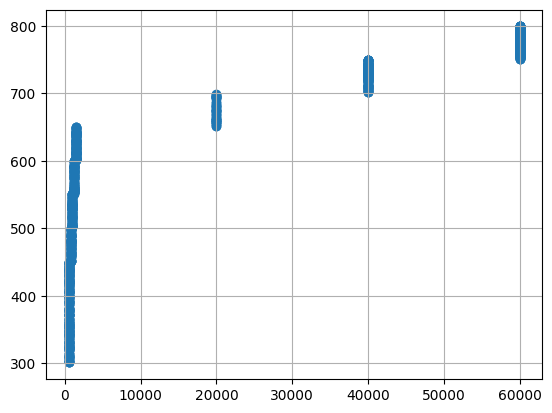

In [52]:
plt.scatter(df_cs_clean['credit_limit'],df_cs_clean['credit_score'])
plt.grid(True) 
plt.show()

In [53]:
bin_range=[300,450,500,550,600,650,700,750,800]
bin_label=['300-449','450-499','500-549','550-599','600-649','650-699','700-749','750-800']
df_cs_clean['credit_range']=pd.cut(df_cs_clean['credit_score'],bins=bin_range, labels=bin_label,include_lowest=True, right=False)
df_cs_clean.head()


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [54]:
df_cs_clean[df_cs_clean['credit_range']=='700-749']

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [55]:
j=df_cs_clean.groupby('credit_range').credit_limit.agg(lambda x: x.mode().iloc[0]).reset_index()

In [56]:
j

,credit_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-800,60000.0


In [57]:
df_cs_clean.sample()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range
307,308,468,0.786537,303.0,3.0,750.0,450-499


In [58]:
df_clean=pd.merge(df_cs_clean,j, on='credit_range', suffixes=('','_mode'))
df_clean.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [59]:
df_clean['credit_limit'].fillna(df_clean['credit_limit_mode'],inplace=True)

In [60]:
df_clean.shape

(1000, 8)

In [61]:
df_clean.sample(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode
76,77,750,0.197159,4399.0,3.0,40000.0,750-800,60000.0
400,401,420,0.319390,139.0,0.0,500.0,300-449,500.0
860,861,578,0.168979,159.0,2.0,1250.0,550-599,1250.0
737,738,522,0.119522,76.0,3.0,1000.0,500-549,1000.0
573,574,324,0.608315,269.0,1.0,500.0,300-449,500.0


In [62]:
df_clean.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


In [63]:
df_clean[df_clean['outstanding_debt']>df_clean['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-800,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-800,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [64]:
def make_outdept(row):
    if row['outstanding_debt']>row['credit_limit']:
        return row['credit_limit']
    else:
        return row['outstanding_debt']
        
    
df_clean['outstanding_debt']=df_clean.apply(make_outdept,axis=1)

In [65]:
df_clean[df_clean['outstanding_debt']>df_clean['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode


In [66]:
df_clean.loc[[766,862,723]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode
766,767,473,0.611750,750.0,1.0,750.0,450-499,750.0
862,863,792,0.399555,60000.0,3.0,60000.0,750-800,60000.0
723,724,465,0.658173,750.0,3.0,750.0,450-499,750.0


In [67]:
df_m=df_c.merge(df_clean, on='cust_id', how='inner')
df_m.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,29-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [68]:
numerical_col=['credit_score','credit_utilisation','outstanding_debt','credit_limit','annual_income','age']
correlation_matrix=df_m[numerical_col].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


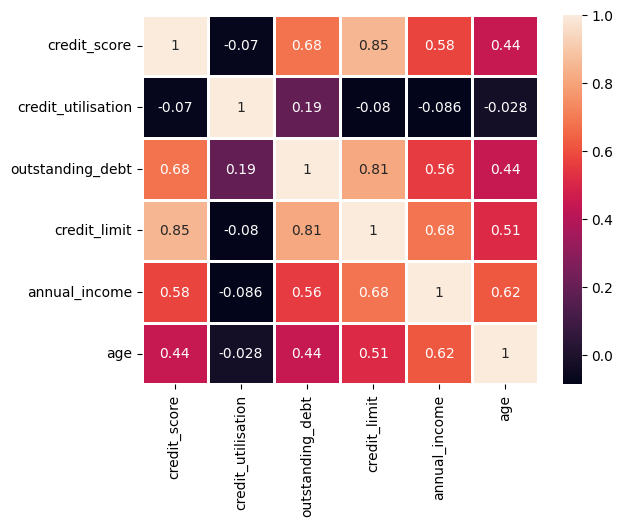

In [69]:
sns.heatmap(correlation_matrix, annot=True,linewidths=0.8)
plt.show()

In [70]:
df_t.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [71]:
df_t.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [72]:
df_t[df_t['platform'].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [73]:
df_t['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [74]:
df_t[df_t['product_category']=='Sports']

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
10,11,937,2023-01-01,517,Flipkart,Sports,Net Banking
13,14,663,2023-01-01,457,Flipkart,Sports,Debit Card
17,18,597,2023-01-01,435,Flipkart,Sports,Gpay
18,19,704,2023-01-01,321,Meesho,Sports,Debit Card
...,...,...,...,...,...,...,...
499938,499939,738,2023-09-05,327,Alibaba,Sports,Phonepe
499941,499942,687,2023-09-05,494,Alibaba,Sports,Credit Card
499963,499964,693,2023-09-05,397,Amazon,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [75]:
ki=df_t['platform'].mode()[0]
ki


'Amazon'

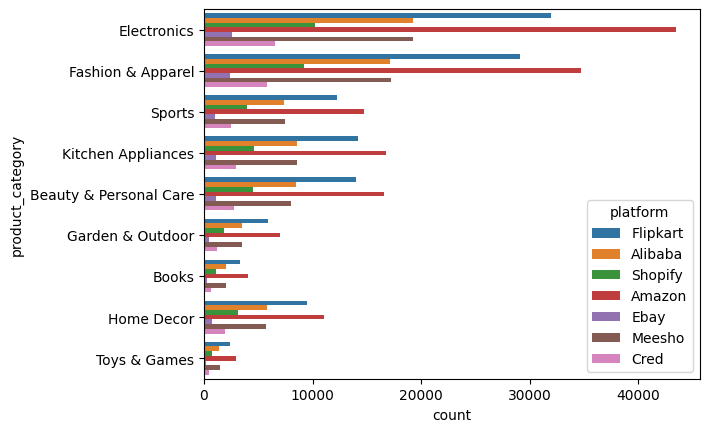

In [76]:
sns.countplot(y='product_category', hue='platform' ,data=df_t)
plt.show()

In [77]:
df_t['platform'].fillna(ki,inplace=True)

In [78]:
df_t.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [79]:
df_t.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [80]:
df_t.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [81]:
df_t[df_t['tran_amount']==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [82]:
df_tzero=df_t[df_t['tran_amount']==0]

In [83]:
df_tzero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [84]:
df_tzero[df_tzero['payment_type']=='Credit Card']

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [85]:
df_tzero[['payment_type','platform','product_category']].value_counts()

payment_type  platform  product_category
Credit Card   Amazon    Electronics         4734
Name: count, dtype: int64

In [86]:
o=df_t[(df_t['platform']=='Amazon')&(df_t['product_category']=='Electronics')&(df_t['payment_type']=='Credit Card')]
o

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [87]:
i=o[o['tran_amount']>0].tran_amount.median()

In [88]:
i

np.float64(554.0)

In [89]:
df_t['tran_amount'].replace(0,i, inplace=True)

In [90]:
df_t.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

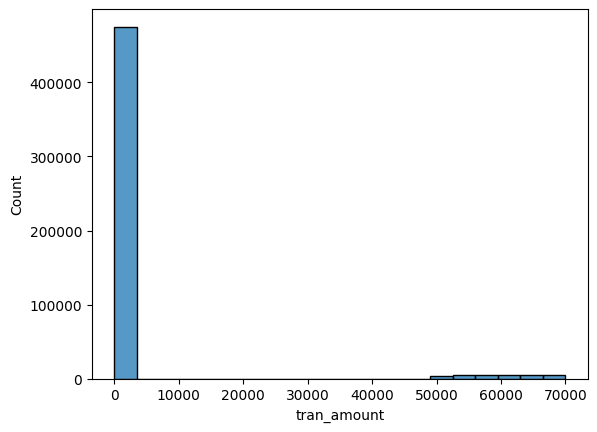

In [91]:
sns.histplot(df_t.tran_amount, bins=20)

In [92]:
q1, q3=df_t['tran_amount'].quantile([0.25,0.75])
q1, q3


(66.0, 413.0)

In [93]:
iqr=q3-q1
lower_b=q1-2*iqr
upper_b=q3+2*iqr
lower_b, upper_b

(-628.0, 1107.0)

In [94]:
df_tout=df_t[df_t['tran_amount']>upper_b]
df_tout.shape

(25000, 7)

In [95]:
df_tout.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [96]:
normal=df_t[df_t['tran_amount']<upper_b]
normal.sample(5)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
129545,129546,472,2023-03-06,305,Meesho,Kitchen Appliances,Phonepe
73599,73600,384,2023-02-06,246,Alibaba,Electronics,Phonepe
31337,31338,920,2023-01-16,777,Amazon,Electronics,Credit Card
162984,162985,840,2023-03-22,53,Ebay,Fashion & Apparel,Phonepe
307655,307656,379,2023-06-02,187,Amazon,Garden & Outdoor,Credit Card


In [97]:
ok=normal.groupby('product_category').tran_amount.mean()

In [98]:
ok

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [99]:
df_t.loc[df_tout.index,'tran_amount']

26        61963
49        57869
94        52881
104       58574
113       51669
          ...  
499742    55131
499888    59679
499900    60184
499966    54678
499996    53022
Name: tran_amount, Length: 25000, dtype: int64

In [100]:
df_t.loc[df_tout.index,'tran_amount']=df_tout['product_category'].map(ok)

In [101]:
df_t.loc[df_tout.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

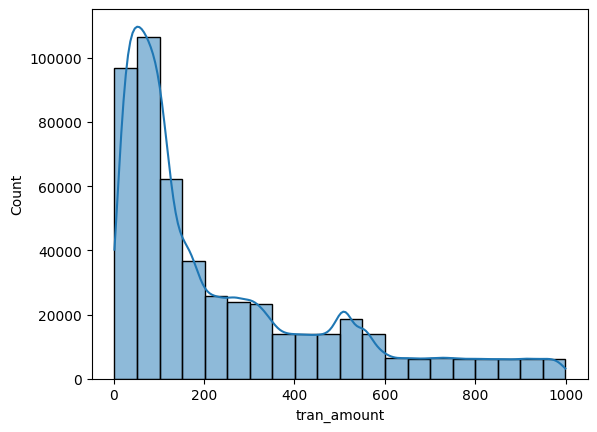

In [102]:
sns.histplot(df_t.tran_amount,kde=True,bins=20)

In [103]:
df_t.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

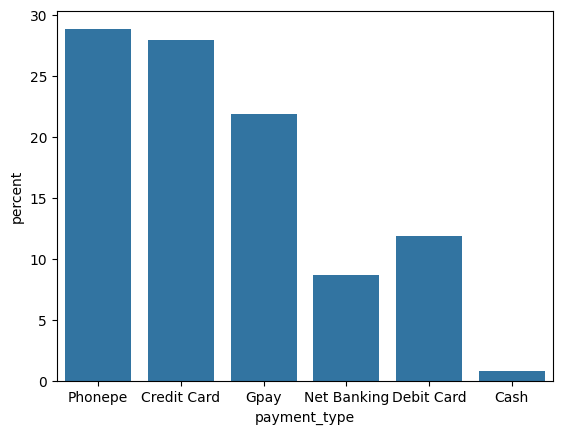

In [104]:
sns.countplot(x=df_t.payment_type,stat='percent')

In [105]:
df_m2=df_m.merge(df_t,on='cust_id',how='inner')
df_m2.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,29-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,29-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,29-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,29-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,29-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


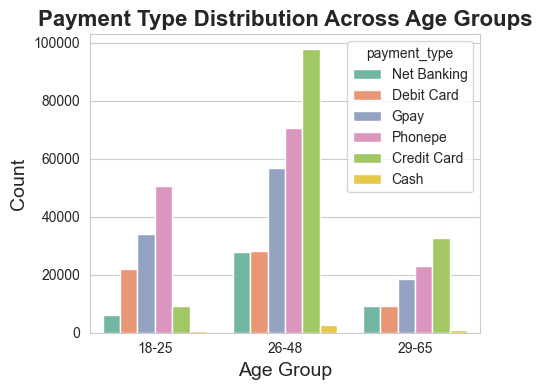

In [106]:
# sns.countplot(x=df_m2.age_group, hue=df_m2.payment_type) 

# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

# Create the plot
plt.figure(figsize=(5, 4))  # Adjust the size
sns.countplot(x='age_group', hue='payment_type', data=df_m2, palette=palette)

# Add title and labels
plt.title("Payment Type Distribution Across Age Groups", fontsize=16, fontweight='bold')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels if needed
# plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot so everything fits without overlapping
plt.show()


<Axes: xlabel='age_group', ylabel='count'>

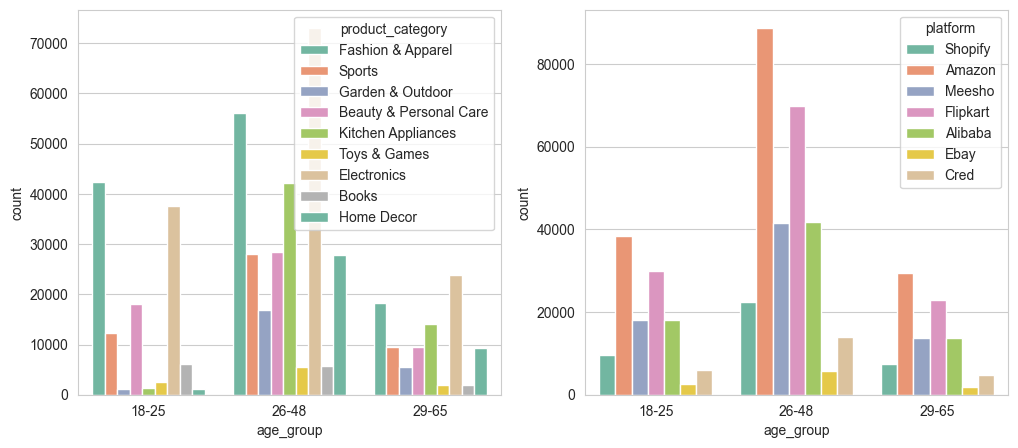

In [107]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='age_group', hue='product_category', data=df_m2, palette=palette,ax=ax1)
sns.countplot(x='age_group', hue='platform', data=df_m2, palette=palette,ax=ax2)

#### Further analysis on age group

In [108]:
age_group_metrics = df_m.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,29-65,260165.925134,41699.197861,701.524064


#### Finalize Target Market For a Trial Credit Card Launch

#### Targeting Untapped market

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care